[Reference](http://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/)

[Datasets](http://scikit-learn.org/stable/datasets/index.html)

[UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/index.php)

[Wikipedia article on R^2](https://en.wikipedia.org/wiki/Coefficient_of_determination)

[About R-squared](http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit)

[Pandas quick reference](https://pandas.pydata.org/pandas-docs/stable/10min.html)

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import math

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
boston.data.shape

(506, 13)

In [4]:
print "Features:", boston.feature_names
print "Target[:5] =", boston.target[:5]
print "Target length =", len(boston.target)

Features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Target[:5] = [ 24.   21.6  34.7  33.4  36.2]
Target length = 506


In [59]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
bos.columns = boston.feature_names
bos.head()
# bos.sample()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
bos['PRICE'] = boston.target

In [10]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis=1)
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
print "Estimated intercept coefficient", lm.intercept_

Estimated intercept coefficient 36.4911032804


In [14]:
print "Number of coefficients", len(lm.coef_)

Number of coefficients 13


In [14]:
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['Features', 'Estimated coeffcients'])

,Features,Estimated coeffcients
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


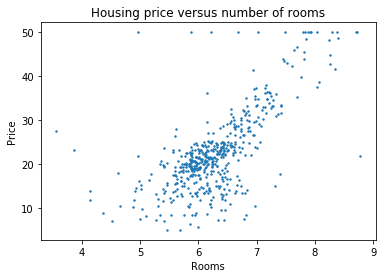

In [15]:

plt.scatter(bos.RM, bos.PRICE, s = 2)
plt.xlabel('Rooms')
plt.ylabel('Price')

plt.title('Housing price versus number of rooms')
plt.show()

In [16]:
lm.predict(X)[0:5]

array([ 30.00821269,  25.0298606 ,  30.5702317 ,  28.60814055,  27.94288232])

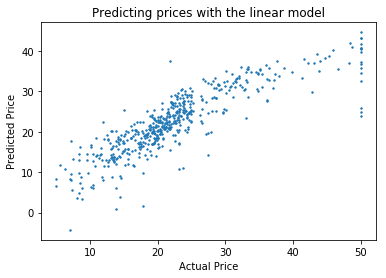

In [51]:
plt.scatter(bos.PRICE, lm.predict(X), s=2)
# plt.plot(bos.PRICE, lm.predict(X))
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.title('Predicting prices with the linear model')
plt.show()

In [18]:
mse = np.mean((bos.PRICE - lm.predict(X))**2)
print "mse", mse
print "rmse", math.sqrt(mse)

mse 21.8977792177
rmse 4.67950630064


In [28]:
pre = lm.predict(X)
print "prediction", pre[0:10]

prediction [ 30.00821269  25.0298606   30.5702317   28.60814055  27.94288232
  25.25940048  23.00433994  19.5347558   11.51696539  18.91981483]


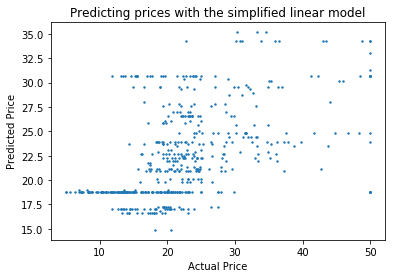

mse2 62.6522000138
rmse2 7.91531427132
prediction [ 29.33984545  23.9469072   23.9469072   22.00544944  22.00544944
  22.00544944  29.55556297  29.55556297  29.55556297  29.55556297]


In [46]:
lm2 = LinearRegression()

XX = X[['PTRATIO']]
lm2.fit(XX, bos.PRICE)

mse = np.mean((bos.PRICE - lm2.predict(XX))**2)
rmse = math.sqrt(mse)

plt.scatter(bos.PRICE, lm2.predict(XX), s=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

plt.title('Predicting prices with the simplified linear model')
plt.show()


print "mse2", mse
print "rmse2", rmse
print "prediction", lm2.predict(XX)[0:10]

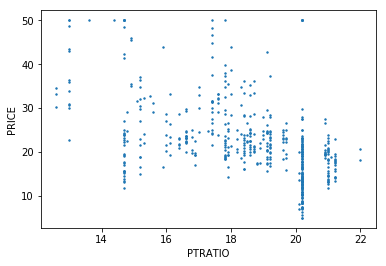

In [47]:
plt.scatter(bos.PTRATIO, bos.PRICE, s=2)
plt.xlabel('PTRATIO')
plt.ylabel('PRICE')
plt.show()

In [48]:
print "mean", np.mean(bos.PRICE)
print "stdev", np.std(bos.PRICE)

mean 22.5328063241
stdev 9.18801154528


In [49]:
# Let's look at R^2

from sklearn.metrics import r2_score
print "r2 for model", r2_score(bos.PRICE, lm.predict(X))
print "r2 for simplified model", r2_score(bos.PRICE, lm2.predict(XX))

r2 for model 0.740607742865
r2 for simplified model 0.257847318009
